In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

**READ THE DATA**

In [ ]:
# dataset is taken from UCI Machine Learning Repository
dataset = pd.read_csv("breast-cancer-wisconsin.csv") #699 instances with 11 attributes 
dataset["intercept"] = 1  # include the intercept term
dataset = dataset.drop(columns="Code_number")

**FILL MISSING VALUES IN DATASET**

In [143]:
 for m in dataset["Bare_Nuclei"]:
    if m == "?":
     dataset["Bare_Nuclei"] = dataset["Bare_Nuclei"].replace("?", 0)
     dataset.fillna(dataset.mean())
    else:
      dataset["Bare_Nuclei"]  = dataset["Bare_Nuclei"].replace(m, int(m))

**SPLIT THE DATA INTO TRAINING AND TEST SETS**

In [144]:
training_set, test_set = dataset.sample(frac=0.8), dataset.sample(frac=0.2)

**DATA PREPROCESSING | CREATE MATRICES FROM DATA**

In [145]:
def create_matrices(dataset, output_name):
  dataset_features = dataset.drop(columns=output_name) # get only the feature columns
  feature_list = dataset_features.columns.values
  feature_matrix, output_matrix  = np.array(dataset.loc[:, feature_list]), np.array(dataset.loc[:,output_name]).reshape((len(dataset.loc[:,output_name]), 1))
  return feature_matrix, output_matrix

In [ ]:
feature_matrix_training, output_matrix_training = create_matrices(training_set, "Class")
print(feature_matrix_training.shape) #  559 x 10
print(output_matrix_training.shape) # 559 x 1

feature_matrix_test, output_matrix_test = create_matrices(test_set, "Class")
print(feature_matrix_test.shape) # 140 x 10
print(output_matrix_test.shape) # 140 x 1

**SIGMOID (LOGISTIC) FUNCTION**

In [153]:
def logistic_function(value):
  return  1/ (1 + np.exp(- 0.005 * np.array(value)))

**DERIVATIVE OF SIGMOID FUNCTION**

In [154]:
def sigmoid_derivative(value):
  return 0.005 * logistic_function(value) * (1 - logistic_function(value))

**PREDICT PROBABILITY**

In [24]:
def predict_probability(feature_matrix, coefficients):
    score = np.dot(feature_matrix, coefficients)
    return logistic_function(score)

**RUN ON TEST SET AND CALCULATE ACCURACY BASED ON LEARNT COEFFICIENTS**

In [124]:
def accuracy_function(test_features, test_outputs, coefficients):
    correct_prediction = 0
    test_prediction = 0
    test_predictions = []
    score  = np.dot(test_features, coefficients)
    for row in score:
        for i in row:
            if i > 0.5:
                test_prediction = 1
            else:
                test_prediction = 0
        test_predictions.append(test_prediction)
    for predicted_value, output in zip(test_predictions, test_outputs):
        if predicted_value == output:
           correct_prediction += 1
    accuracy = correct_prediction/ float(len(test_features))
    return accuracy

**GRADIENT ASCENT**

In [157]:
def logistic_regression_gradient(coefficients, feature_matrix, output_matrix, test_feature_matrix, test_output_matrix, iteration_count=2500):
  accuracy_array = []
  loss_array = []
  coefficients = np.array(coefficients) # make sure it is a numpy array 
  for i in range(iteration_count):
    prediction = predict_probability(feature_matrix, coefficients) 
    error = output_matrix - prediction 
    # tuning parameter 
    tuning = error * sigmoid_derivative(prediction) 
    coefficients += np.dot(np.transpose(feature_matrix), tuning)
    accuracy_array.append(accuracy_function(test_feature_matrix, test_output_matrix, coefficients)) # at each update see how loss and accuracy is changing on test set
    loss_array.append(error.mean())
  return coefficients, accuracy_array, loss_array

**PLOT LOSS AND ACCURACY**

In [127]:
def plot_loss_accuracy(accuracy_array, loss_array):
    fig, axs = plt.subplots(2, 1)
    axs[0].set_title("PLOTTING LOSS AND ACCURACY CHANGE", color="green")
    axs[0].plot(range(len(accuracy_array)), accuracy_array, color="orange")
    axs[0].set_xlabel("ITERATION COUNT", color="red")
    axs[0].set_ylabel("ACCURACY", color="blue", rotation=90)
    axs[1].plot(range(len(loss_array)), loss_array, color="purple")
    axs[1].set_xlabel("ITERATION COUNT", color="red")
    axs[1].set_ylabel("LOSS", color="blue", rotation=90)
    plt.show()

**MODEL**

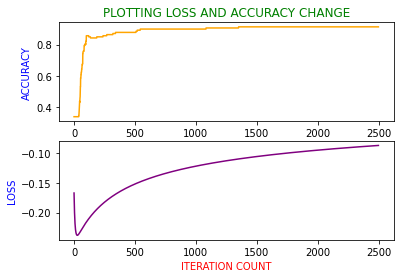

[[ -35.81560862]
 [ 103.81695619]
 [  39.40511046]
 [  18.90400582]
 [ -94.15830047]
 [  83.12647825]
 [ -53.07436321]
 [  44.76093768]
 [ -28.14986859]
 [-218.03059672]]


In [158]:
initialize_coefficients =  np.random.random((10, 1)) 
coefficients, accuracy, loss = logistic_regression_gradient(initialize_coefficients, feature_matrix_training, output_matrix_training, feature_matrix_test, output_matrix_test )
plot_loss_accuracy(accuracy, loss)
print(coefficients)